请输入中文提示语 (Enter Chinese prompt): 高山流水
Error translating prompt: zh --> No support for the provided language.
Please select on of the supported languages:
{'afrikaans': 'af', 'albanian': 'sq', 'amharic': 'am', 'arabic': 'ar', 'armenian': 'hy', 'assamese': 'as', 'aymara': 'ay', 'azerbaijani': 'az', 'bambara': 'bm', 'basque': 'eu', 'belarusian': 'be', 'bengali': 'bn', 'bhojpuri': 'bho', 'bosnian': 'bs', 'bulgarian': 'bg', 'catalan': 'ca', 'cebuano': 'ceb', 'chichewa': 'ny', 'chinese (simplified)': 'zh-CN', 'chinese (traditional)': 'zh-TW', 'corsican': 'co', 'croatian': 'hr', 'czech': 'cs', 'danish': 'da', 'dhivehi': 'dv', 'dogri': 'doi', 'dutch': 'nl', 'english': 'en', 'esperanto': 'eo', 'estonian': 'et', 'ewe': 'ee', 'filipino': 'tl', 'finnish': 'fi', 'french': 'fr', 'frisian': 'fy', 'galician': 'gl', 'georgian': 'ka', 'german': 'de', 'greek': 'el', 'guarani': 'gn', 'gujarati': 'gu', 'haitian creole': 'ht', 'hausa': 'ha', 'hawaiian': 'haw', 'hebrew': 'iw', 'hindi': 'hi', 'hmong': 'hmn', 

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

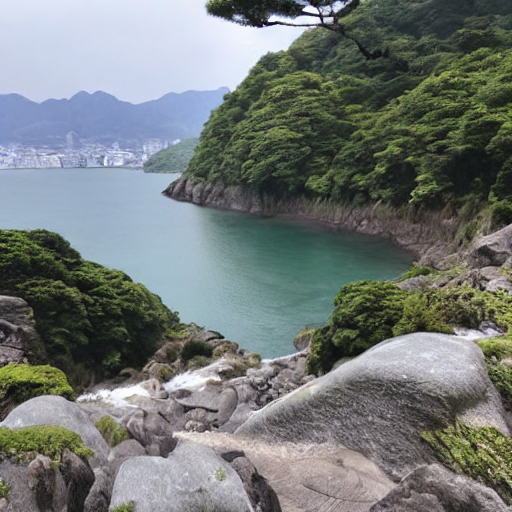

In [8]:
!pip install deep-translator
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
from deep_translator import GoogleTranslator

def translate_prompt(chinese_prompt):
    """Translate a Chinese prompt to English."""
    try:
        translation = GoogleTranslator(source='zh', target='en').translate(chinese_prompt)
        return translation
    except Exception as e:
        print(f"Error translating prompt: {e}")
        return chinese_prompt  # Fallback to the original prompt

def generate_image(prompt):
    """Generate an image using Stable Diffusion based on the given prompt."""
    try:
        from diffusers import StableDiffusionPipeline
        import torch

        model_id = "runwayml/stable-diffusion-v1-5"  # Replace with your model path if locally installed
        pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
        pipe = pipe.to("cuda")  # Use GPU if available

        image = pipe(prompt).images[0]
        return image
    except Exception as e:
        print(f"Error generating image: {e}")
        return None

def main():
    chinese_prompt = input("请输入中文提示语 (Enter Chinese prompt): ")
    english_prompt = translate_prompt(chinese_prompt)
    print(f"Translated prompt: {english_prompt}")

    image = generate_image(english_prompt)
    if image:
        display(image)  # Display the image in Colab using IPython
    else:
        print("Failed to generate image.")

if __name__ == "__main__":
    main()